/tmp/ipykernel_24900/3171912122.py:65: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(game_scores_by_exp, labels=labels)


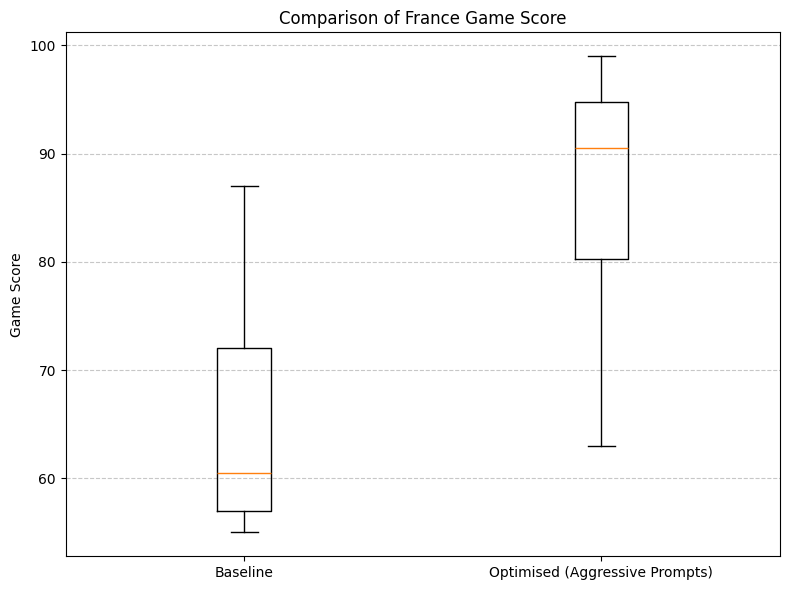

/tmp/ipykernel_24900/3171912122.py:76: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(sc_counts_by_exp, labels=labels)


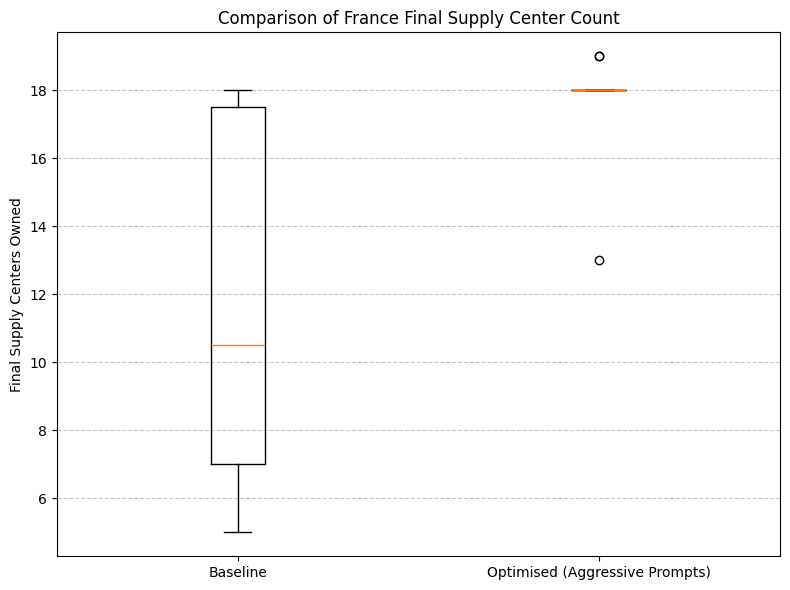

Final Supply Center Counts for France:
----------------------------------------
Baseline:
[10, 7, 6, 7, 16, 18, 5, 18, 18, 11]
  (N=10, Mean=11.60, Median=10.50)
----------------------------------------
Optimised (Aggressive Prompts):
[19, 18, 18, 19, 13, 18, 18, 18, 18, 18]
  (N=10, Mean=17.70, Median=18.00)
----------------------------------------


In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------------------------------------------------------
# EDIT THE LIST BELOW: absolute or relative paths to your experiment folders
# Each folder should contain analysis/statistical_game_analysis/individual/*
# ---------------------------------------------------------------------------
exp_dirs = {
    "../data/sam-exp103": "Baseline",
    "../data/sam-exp104": "Optimised (Aggressive Prompts)",
}

# ---------------------------------------------------------------------------
# Collect France game_score and final_supply_centers_owned for each experiment
# ---------------------------------------------------------------------------
records = []
for exp_dir, label in exp_dirs.items():
    exp_path = Path(exp_dir).expanduser().resolve()
    csv_dir = exp_path / "analysis" / "statistical_game_analysis" / "individual"
    
    if not csv_dir.exists():
        print(f"warning: Directory not found, skipping: {csv_dir}")
        continue
        
    csv_files = sorted(csv_dir.glob("run_*_game_analysis.csv"))
    
    if not csv_files:
        print(f"warning: No CSV files found in {csv_dir}")
        continue

    for csv_file in csv_files:
        try:
            df = pd.read_csv(csv_file)
            france_rows = df[df["power_name"] == "FRANCE"]
            if not france_rows.empty:
                # Ensure required columns exist
                if "game_score" in france_rows.columns and "final_supply_centers_owned" in france_rows.columns:
                    records.append({
                        "Experiment": label,
                        "game_score": float(france_rows.iloc[0]["game_score"]),
                        "final_sc_count": int(france_rows.iloc[0]["final_supply_centers_owned"]),
                    })
        except Exception as exc:
            print(f"warning: Could not process {csv_file} – {exc}")

# ---------------------------------------------------------------------------
# Build summary DataFrame
# ---------------------------------------------------------------------------
if not records:
    raise RuntimeError("No data collected – check the paths and directory structure.")

data_df = pd.DataFrame(records)

# Prepare data for plotting and printing
labels = list(exp_dirs.values())
game_scores_by_exp = [data_df[data_df["Experiment"] == label]["game_score"] for label in labels]
sc_counts_by_exp = [data_df[data_df["Experiment"] == label]["final_sc_count"] for label in labels]

# ---------------------------------------------------------------------------
# Plot 1: Box plot for Game Score
# ---------------------------------------------------------------------------
plt.figure(figsize=(8, 6))
plt.boxplot(game_scores_by_exp, labels=labels)
plt.title("Comparison of France Game Score")
plt.ylabel("Game Score")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# ---------------------------------------------------------------------------
# Plot 2: Box plot for Final Supply Centers Owned
# ---------------------------------------------------------------------------
plt.figure(figsize=(8, 6))
plt.boxplot(sc_counts_by_exp, labels=labels)
plt.title("Comparison of France Final Supply Center Count")
plt.ylabel("Final Supply Centers Owned")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# ---------------------------------------------------------------------------
# Print the final supply center counts for all games
# ---------------------------------------------------------------------------
print("Final Supply Center Counts for France:")
print("-" * 40)
for i, label in enumerate(labels):
    # Convert to a simple list for clean printing
    sc_list = sc_counts_by_exp[i].tolist()
    print(f"{label}:")
    print(sc_list)
    print(f"  (N={len(sc_list)}, Mean={np.mean(sc_list):.2f}, Median={np.median(sc_list):.2f})")
    print("-" * 40)